# Tucil 2 Intelligensi Buatan Exploratory Data Analysis

Author
| NIM | Nama |
|-----|------|
| 13521057 | Hosea Nathanael Abetnego |
| 13521127 | Marcel Ryan Antony |

# Table of Contents
1. [Data Cleaning](#1)<br>
    1.1 [Duplicate Values](#2)<br>
    1.2 [Missing Values](#3)<br>
    1.3 [Outlier Values](#4)<br>
2. [Plotting Numerical Columns](#5)<br>
3. [Plotting Categorical Columns](#6)<br>
4. [Correlations with Target](#7)<br>
    4.1 [Numerical Columns with Target](#8)<br>
    4.2 [Categorical Columns with Target](#9)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import kurtosis
from scipy.stats import pointbiserialr
from prettytable import PrettyTable
from pypair.association import binary_continuous

In [2]:
df = pd.read_csv('data_train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0


In [3]:
# Basic statistics of the data
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1237.145714,0.493571,1.521714,0.502857,4.27500,0.530000,31.962143,0.507857,139.375714,4.481429,...,643.177857,1251.717143,2106.731429,12.285714,5.665000,11.042143,0.760714,0.489286,0.495000,1.477857
std,430.051785,0.500137,0.814723,0.500171,4.32417,0.499278,18.162970,0.288539,35.400803,2.279836,...,444.628980,428.982850,1078.347277,4.204198,4.372234,5.399052,0.426800,0.500064,0.500154,1.117575
min,501.000000,0.000000,0.500000,0.000000,0.00000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,864.750000,0.000000,0.700000,0.000000,1.00000,0.000000,16.000000,0.200000,108.000000,2.000000,...,273.750000,876.500000,1201.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1219.000000,0.000000,1.500000,1.000000,3.00000,1.000000,32.000000,0.500000,139.000000,4.000000,...,561.000000,1247.000000,2102.000000,12.000000,5.000000,11.000000,1.000000,0.000000,0.000000,1.000000
75%,1602.000000,1.000000,2.200000,1.000000,7.00000,1.000000,48.000000,0.800000,169.000000,7.000000,...,950.250000,1627.500000,3035.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.00000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<a id="1"></a> 
# Data Cleaning

In [4]:
# Check every column unique value
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column} column: {len(unique_values)}")

Unique values in battery_power column: 918
Unique values in blue column: 2
Unique values in clock_speed column: 26
Unique values in dual_sim column: 2
Unique values in fc column: 20
Unique values in four_g column: 2
Unique values in int_memory column: 63
Unique values in m_dep column: 10
Unique values in mobile_wt column: 121
Unique values in n_cores column: 8
Unique values in pc column: 21
Unique values in px_height column: 935
Unique values in px_width column: 908
Unique values in ram column: 1170
Unique values in sc_h column: 15
Unique values in sc_w column: 19
Unique values in talk_time column: 19
Unique values in three_g column: 2
Unique values in touch_screen column: 2
Unique values in wifi column: 2
Unique values in price_range column: 4


<a id="2"></a> 
## Remove Duplicate Values

In [5]:
print("Rows before dropping duplicate values:", len(df))
df.drop_duplicates(inplace=True)
print("Rows after dropping duplicate values:", len(df))

Rows before dropping duplicate values: 1400
Rows after dropping duplicate values: 1400


<a id="3"></a> 
## Check Missing Values

In [6]:
def check_null_data(data):
    missing = data.isnull().sum()
    nans = missing[missing > 0].sort_values(ascending=False)
    for col in nans.index:
        print(f"{col} Null Values: {round(100 - data[col].value_counts().sum()/len(data) * 100, 2)}% of the dataset ({len(data) - data[col].value_counts().sum()})")

In [7]:
check_null_data(df)

Dapat dilihat berdasarkan fungsi diatas yang mencari null value untuk tiap kolom, tidak ditemukan satu pun null value pada kolom-kolom yang ada di data sehingga data yang diberikan sudah bagus.

<a id="4"></a> 
## Check Outlier Value

In [8]:
# Split column into numerical and categorical column
numerical_columns = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time"]
categorical_columns = []
for column in df.columns:
    if column not in numerical_columns:
        categorical_columns.append(column)

print(numerical_columns)
print(categorical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [9]:
# Checking outlier value for every column using Interquartile Range
def find_outliers_IQR(column):

   Q1 = column.quantile(0.25)

   Q3 = column.quantile(0.75)

   IQR = Q3 - Q1

   outliers = column[( (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)) )]

   return outliers

In [10]:
outliers_table = PrettyTable()
outliers_table.field_names = ["Column", "Number of Outliers", "Max Outlier Value", "Min Outlier Value", "Percentage of Outliers"]

# Checking outliers for every column
for column in numerical_columns:
    outliers = find_outliers_IQR(df[column])
    
     # Calculate the percentage of outliers
    percentage_outliers = len(outliers) / len(df) * 100

    # Add a row to the PrettyTable
    outliers_table.add_row([column, len(outliers), outliers.max(), outliers.min(), f'{percentage_outliers:.2f}%'])
    
# Print the results table with borders
print(outliers_table)


+---------------+--------------------+-------------------+-------------------+------------------------+
|     Column    | Number of Outliers | Max Outlier Value | Min Outlier Value | Percentage of Outliers |
+---------------+--------------------+-------------------+-------------------+------------------------+
| battery_power |         0          |        nan        |        nan        |         0.00%          |
|  clock_speed  |         0          |        nan        |        nan        |         0.00%          |
|       fc      |         11         |         19        |         17        |         0.79%          |
|   int_memory  |         0          |        nan        |        nan        |         0.00%          |
|     m_dep     |         0          |        nan        |        nan        |         0.00%          |
|   mobile_wt   |         0          |        nan        |        nan        |         0.00%          |
|    n_cores    |         0          |        nan        |      

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

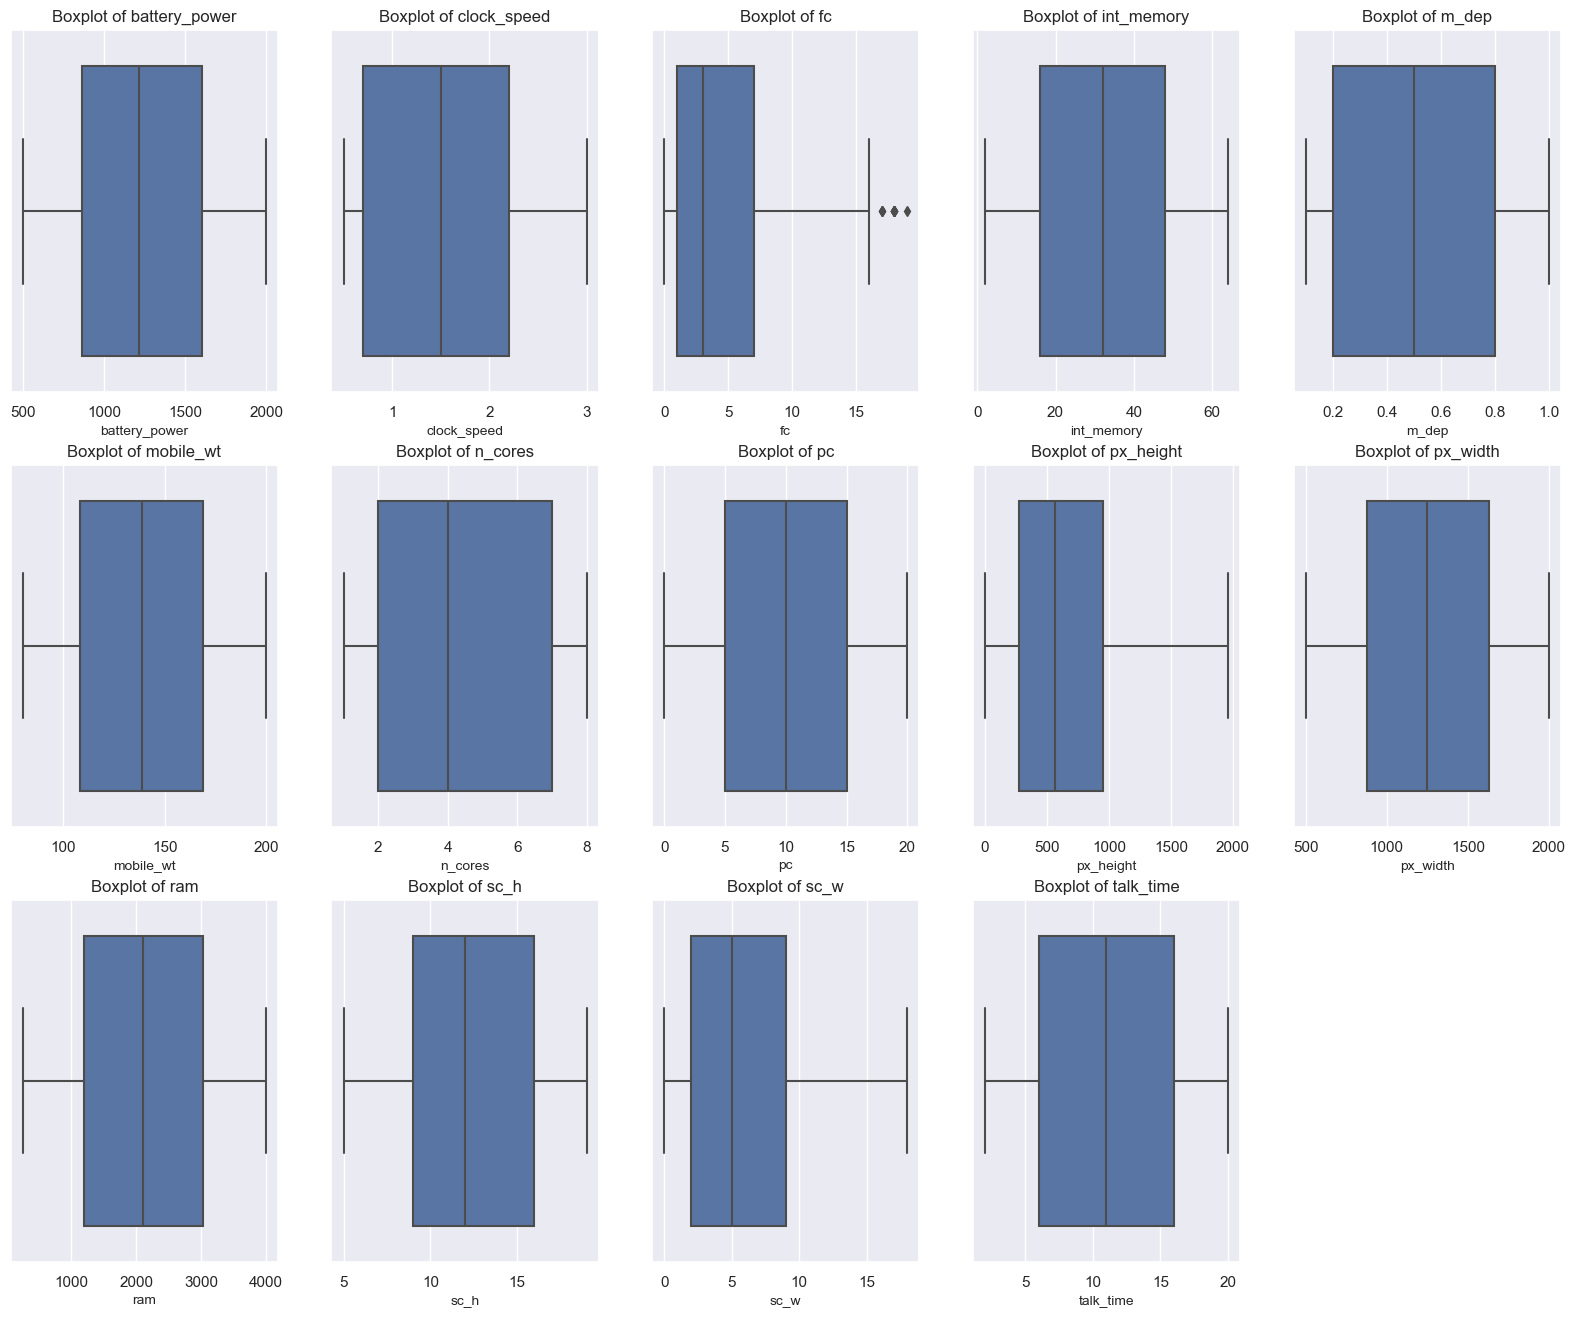

In [11]:
sns.set()
fig, axes = plt.subplots(3, 5, figsize=(20, 16))

# Iterate all numerical columns
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 5)  # Calculate the row and column for the current plot

    ax = axes[row, col]  # Get the current axis in the grid

    sns.boxplot(data=df, x=column, orient="h", ax=ax)  # Create horizontal boxplots on the current axis

    ax.set_title(f'Boxplot of {column}', fontsize=12)
    ax.set_xlabel(column, fontsize=10)

# Hide any empty subplots (if there are more axes than columns)
for i in range(len(numerical_columns), 3 * 5):
    axes[i // 5, i % 5].axis('off')

plt.show()

<a id="5"></a> 
# Plotting Numerical Columns

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

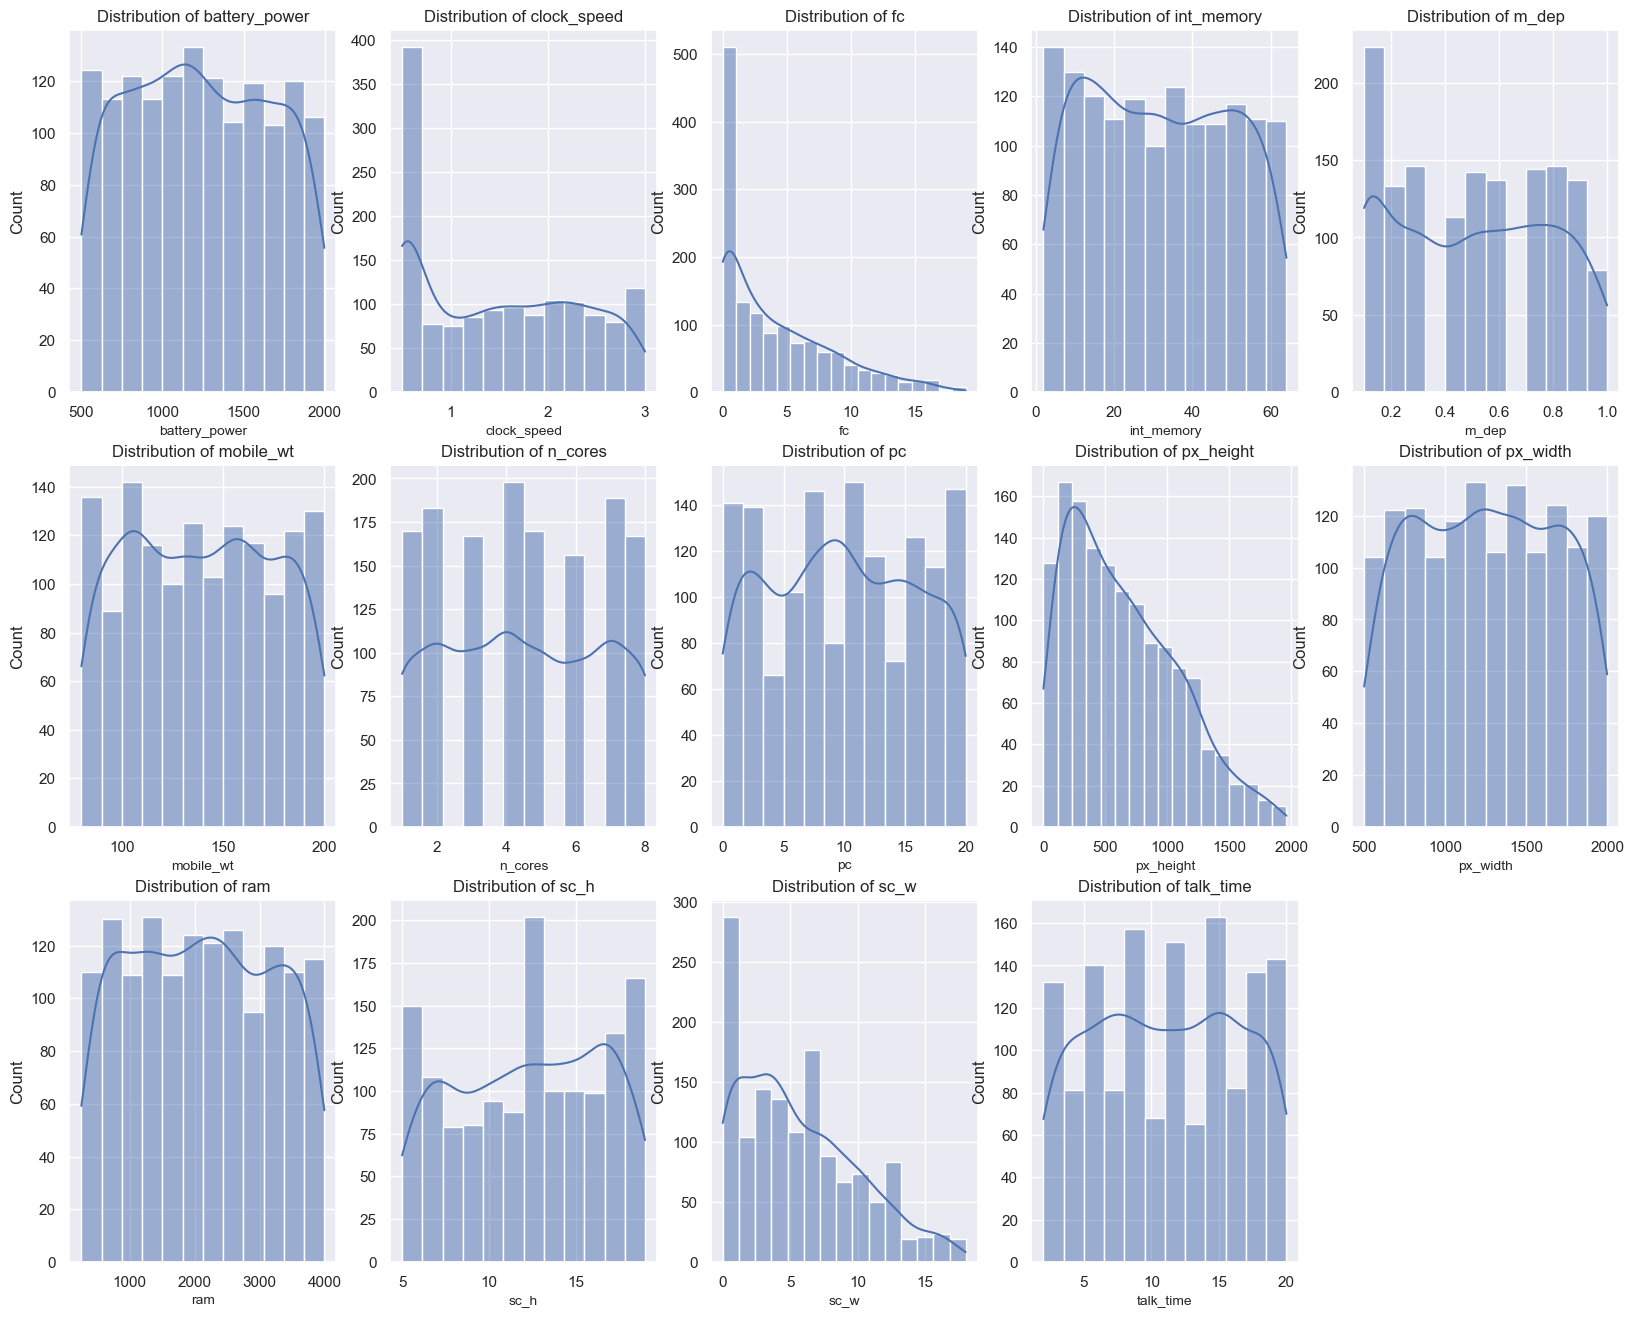

Kurtosis of column battery_power: -1.1681835057892338
Kurtosis of column clock_speed: -1.3290622936694017
Kurtosis of column fc: 0.28807491164573396
Kurtosis of column int_memory: -1.2271038904205902
Kurtosis of column m_dep: -1.266585482565444
Kurtosis of column mobile_wt: -1.2101668323623873
Kurtosis of column n_cores: -1.2320948787955932
Kurtosis of column pc: -1.1640061988940513
Kurtosis of column px_height: -0.31938304471706
Kurtosis of column px_width: -1.1761112837507963
Kurtosis of column ram: -1.18619191592568
Kurtosis of column sc_h: -1.1833343207794749
Kurtosis of column sc_w: -0.33772957471254195
Kurtosis of column talk_time: -1.192047843180249


In [12]:
sns.set()
fig, axes = plt.subplots(3, 5, figsize=(20, 16))

# Iterate all numerical columns
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 5)  # Calculate the row and column for the current plot

    ax = axes[row, col]  # Get the current axis in the grid

    sns.histplot(data=df, x=column, kde=True, ax=ax)  # Create the distribution plot on the current axis

    ax.set_title(f'Distribution of {column}', fontsize=12)
    ax.set_xlabel(column, fontsize=10)

# Hide any empty subplots (if there are more axes than columns)
for i in range(len(numerical_columns), 3 * 5):
    axes[i // 5, i % 5].axis('off')

plt.show()

# iterate all numerical columns
for column in numerical_columns:
    kurt = kurtosis(df[column])  # Calculate kurtosis for the values in the column
    print(f'Kurtosis of column {column}: {kurt}')


<a id="6"></a> 
# Plotting Categorical Columns

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


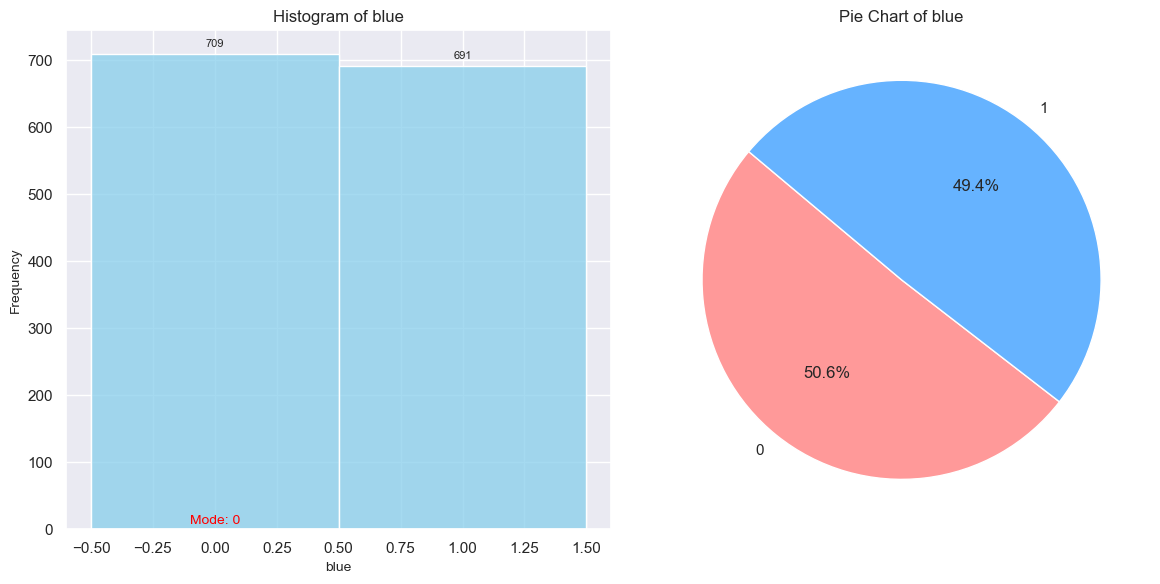

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


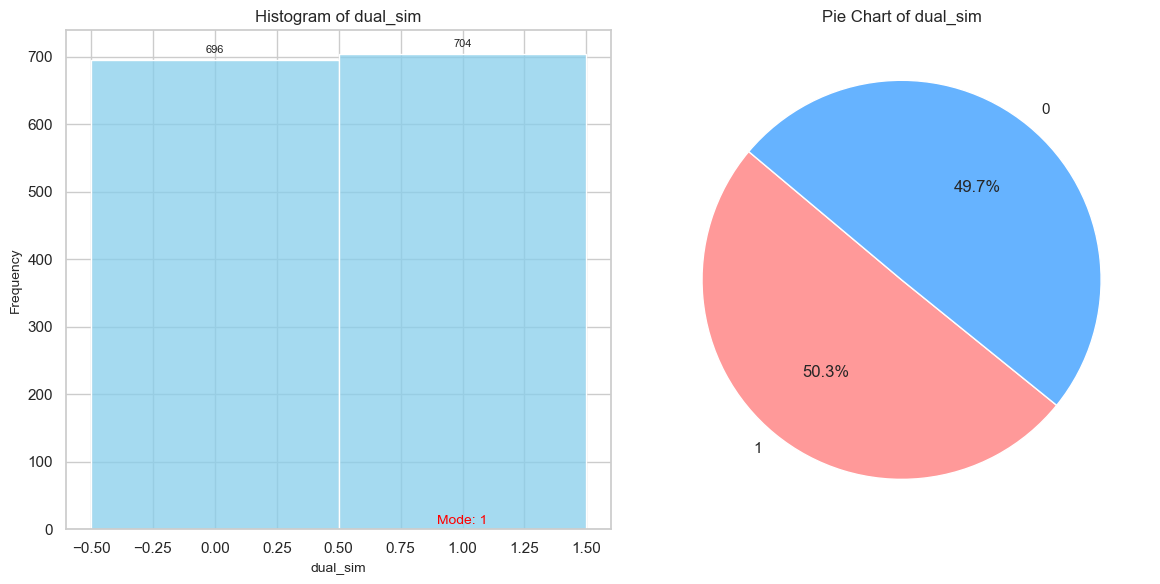

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


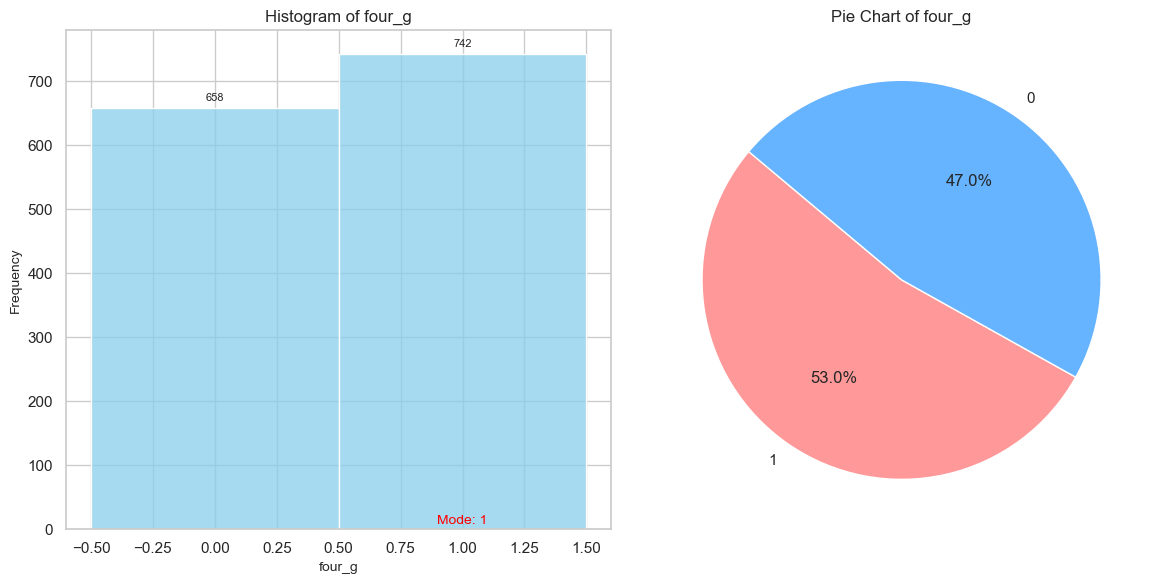

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


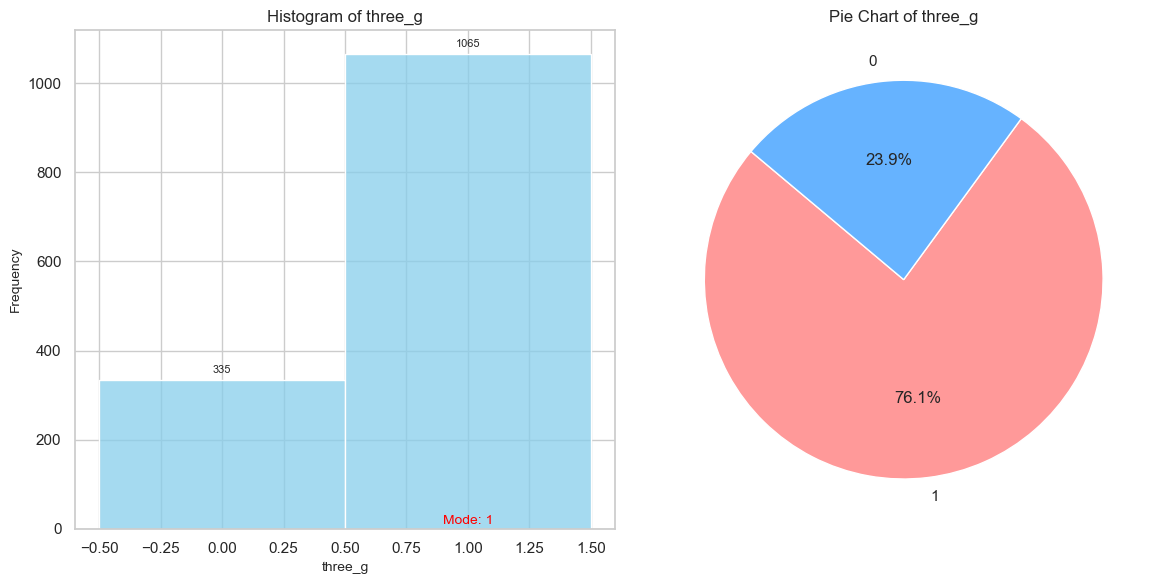

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


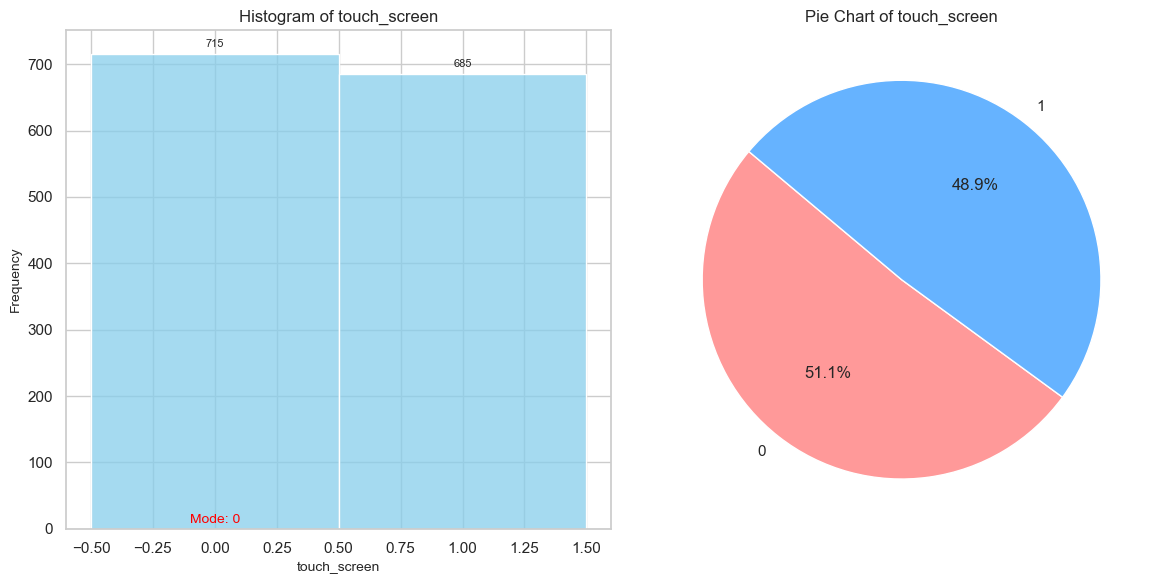

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


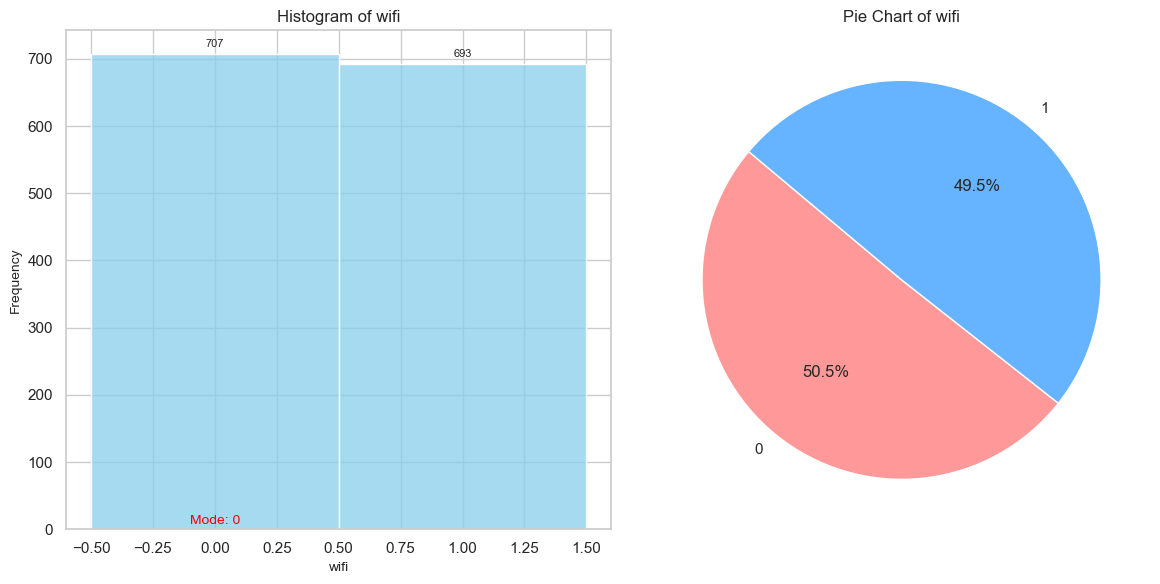

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


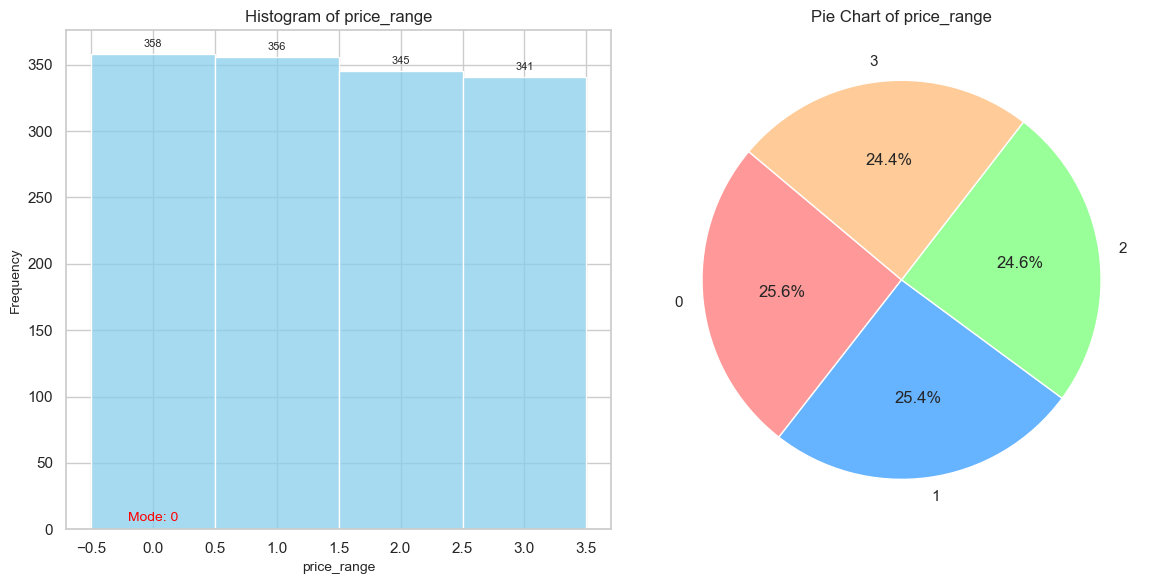

In [13]:
# Iterate over each column
for column in categorical_columns:
    # Create a new figure with two subplots (histogram and pie chart)
    plt.figure(figsize=(12, 6))
    
    # Create a histogram using Seaborn (subplot 1)
    plt.subplot(1, 2, 1)
    sns.set_style("whitegrid")  # Set Seaborn style
    ax_hist = sns.histplot(data=df, x=column, bins=1, discrete=True, color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

    # Calculate the mode
    mode_value = df[column].mode().values[0]

    # Display the mode on the plot
    plt.text(mode_value, 4, f'Mode: {mode_value}', ha='center', va='bottom', color='red', fontsize=10)

    # Label the bars with frequencies
    for rect in ax_hist.patches:
        height = rect.get_height()
        ax_hist.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5),
                        textcoords='offset points', ha='center', fontsize=8)

    # Create a pie chart (subplot 2)
    plt.subplot(1, 2, 2)
    labels = df[column].value_counts().index
    sizes = df[column].value_counts().values
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # You can customize the colors

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Pie Chart of {column}', fontsize=12)

    # Ensure that the layout is tight
    plt.tight_layout()

    # Show the plot for the current column
    plt.show()

<a id="7"></a> 
# Plot Correlation with Target

<a id="8"></a> 
## Numerical Columns Correlation with Target

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marce\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


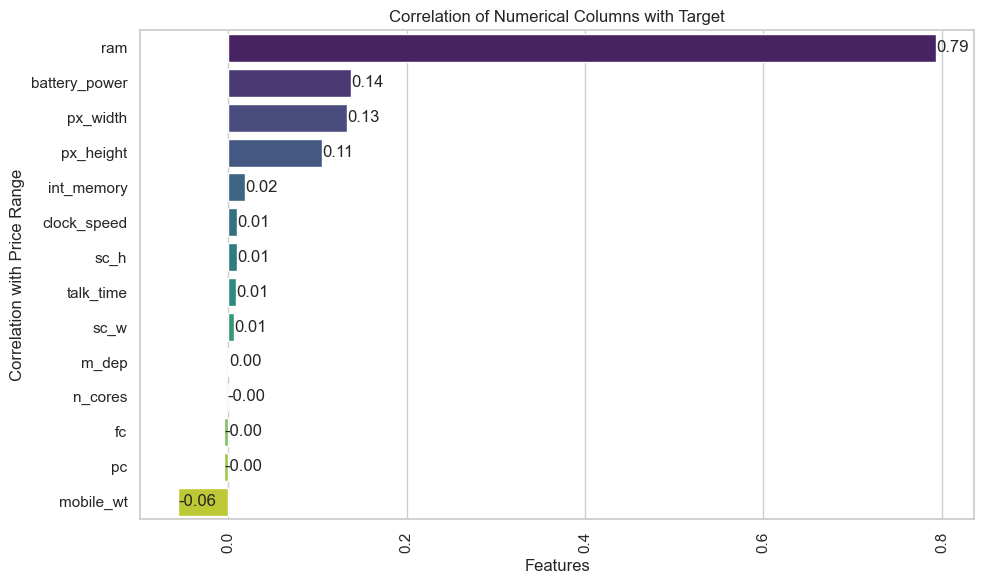

In [14]:
# Calculate the correlation matrix
numerical_columns.append('price_range')

df_numerical = df[numerical_columns]

numerical_columns.remove('price_range')

correlation_matrix = df_numerical.corr(method='kendall')

# Extract the correlations with the target variable 'price_range'
correlation_with_target = correlation_matrix['price_range'].drop('price_range')

# Sort the correlations in descending order
sorted_correlations = correlation_with_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Price Range')
plt.title('Correlation of Numerical Columns with Target')
plt.tight_layout()

for i, value in enumerate(sorted_correlations):
    plt.text(value, i, f'{value:.2f}', va='center')
plt.show()

<a id="9"></a> 
## Categorical Columns Correlation with Target

In [15]:
def rank_biserial(binary_values, ordinal_values):
    n = len(binary_values)
    Y0 = sum(ordinal_values[i] for i, is_binary in enumerate(binary_values) if is_binary == 0) / sum(1 for is_binary in binary_values if is_binary == 0)
    Y1 = sum(ordinal_values[i] for i, is_binary in enumerate(binary_values) if is_binary == 1) / sum(1 for is_binary in binary_values if is_binary == 1)
    
    r_rb = 2 * (Y1 - Y0) / n

    return r_rb


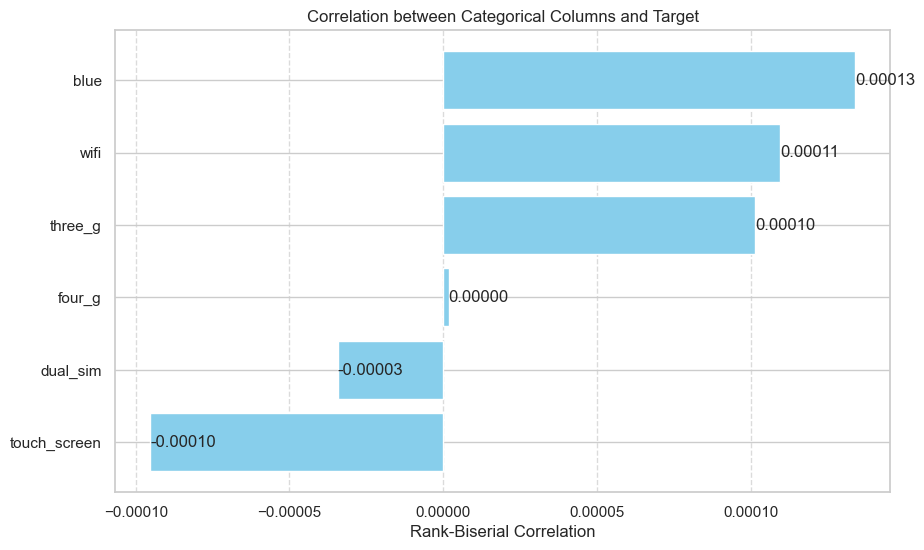

In [17]:
# Dictionary for correlation value
categorical_columns.remove('price_range')

correlation_dict = {}

for column in categorical_columns:
    rank_biserial_corr = rank_biserial(df[column], df['price_range'])
    correlation_dict[column] = rank_biserial_corr

categorical_columns.append('price_range')

# Sort the correlation values in descending order
sorted_correlations = sorted(correlation_dict.items(), key=lambda x: x[1], reverse=False)

# Extract the sorted columns and correlation values
sorted_columns, sorted_correlation_values = zip(*sorted_correlations)


# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_columns, sorted_correlation_values, color='skyblue')
plt.xlabel('Rank-Biserial Correlation')
plt.title('Correlation between Categorical Columns and Target')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels at the top of the bars
for col, corr_value in zip(sorted_columns, sorted_correlation_values):
    plt.text(corr_value, col, f'{corr_value:.5f}', va='center')
    
plt.show()